In [89]:
import pandas as pd
import numpy as np

exam = pd.read_csv('./data/exam.csv')           # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [7]:
exam['nclass'] #컬럼추출
exam['nclass'] == 1 #컬럼의 각 항목들이 1인가?
nclass1 #True, False의 Series
exam[nclass1]  # nclass가 True인 행 추출

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58


In [9]:
# 수학 점수가 80점 이상이면 추출
exam[exam['math'] >= 80] 

,id,nclass,math,english,science
6,7,2,80.0,90,45
17,18,5,80.0,78,90
18,19,5,89.0,68,87


In [8]:
# nclass가 1이면서 수학 점수가 50점 이상
exam[(exam['nclass'] == 1) & (exam['math'] >= 50)]

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60


In [10]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60


In [16]:
round(exam.math.mean())

55

In [31]:
# nclass가 1인 행의 math 열
exam[exam['nclass'] == 1][['math','english']].mean()

math       46.666667
english    94.750000
dtype: float64

In [32]:
# pandas 함수만 사용
exam.groupby('nclass') \
  .agg(math    = ('math', 'mean'), 
       english = ('english', 'mean'))

,math,english
nclass,,
1,46.666667,94.75
2,51.666667,84.25
3,45.000000,86.50
4,50.666667,84.75
5,78.000000,74.25


In [39]:
# pandas 함수와 [] 함께 사용
exam.groupby('nclass')[['math', 'english']].mean() # 뽑은 컬럼의 평균
exam.groupby('nclass').mean() # 모든 컬럼의 평균

,id,math,english,science
nclass,,,,
1,2.5,46.666667,94.75,61.50
2,6.5,51.666667,84.25,58.25
3,10.5,45.000000,86.50,39.25
4,14.5,50.666667,84.75,55.00
5,18.5,78.000000,74.25,83.25


In [45]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [79]:
exam.columns = [list('abcde')]
exam

ValueError: Length mismatch: Expected axis has 2 elements, new values have 5 elements

In [94]:
exam.set_index( 
    pd.Series( [("a-%s" % (i+1)) for i in range(20)] ) 
)

,id,nclass,math,english,science
a-1,1,1,50.0,98,50
a-2,2,1,60.0,97,60
a-3,3,1,NaN,86,78
a-4,4,1,30.0,98,58
a-5,5,2,25.0,80,65
a-6,6,2,50.0,89,98
a-7,7,2,80.0,90,45
a-8,8,2,NaN,78,25
a-9,9,3,20.0,98,15
a-10,10,3,50.0,98,45


In [62]:
exam = pd.DataFrame({'var1' : [1, 2, 3], 
                   'var2' : [4, 5, 6]})
exam

,var1,var2
0,1,4
1,2,5
2,3,6


In [65]:
# 인덱스 문자열 지정하기
df = pd.DataFrame({'var1' : [1, 2, 3], 
                   'var2' : [4, 5, 6]},
                   index = ['kim', 'lee', 'park'])
df

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [69]:
df.loc[['kim','park']]

,var1,var2
kim,1,4
park,3,6


In [71]:
df.loc['kim','var1']

1

In [72]:
df.loc[,'var1']

SyntaxError: invalid syntax (4252749488.py, line 1)

In [73]:
df.loc[ : ,'var1']

kim     1
lee     2
park    3
Name: var1, dtype: int64

# 인덱싱, 슬라이싱
- 인덱싱: 값 한개, 띄엄띄엄 지정, 사용
- 슬라이싱 : 연속적으로 값을 지정. 사용

In [115]:
exam.loc[[0,3,4]]

,id,nclass,math,english,science
0,1,1,50.0,98,50
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [116]:
exam.loc[7:8]

,id,nclass,math,english,science
7,8,2,NaN,78,25
8,9,3,20.0,98,15


In [117]:
# 인덱스 문자열이 있는 데이터 프레임
df_label = pd.DataFrame({'var1' : [1, 2, 3], 
                         'var2' : [4, 5, 6]},
                         index = ['kim', 'lee', 'park'])
df_label

,var1,var2
kim,1,4
lee,2,5
park,3,6


In [123]:
df_label.loc['kim':'lee']

,var1,var2
kim,1,4
lee,2,5


In [125]:
df_label2 = pd.concat([df_label, df_label])
df_label2

,var1,var2
kim,1,4
lee,2,5
park,3,6
kim,1,4
lee,2,5
park,3,6


In [126]:
df_label2.loc['kim']

,var1,var2
kim,1,4
kim,1,4


In [127]:
df_label2.reset_index()

,index,var1,var2
0,kim,1,4
1,lee,2,5
2,park,3,6
3,kim,1,4
4,lee,2,5
5,park,3,6


In [131]:
exam.loc[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58


In [133]:
exam[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58


In [135]:
# 수학 점수가 60점 이상이면 추출
exam.loc[exam['math'] >= 60]

,id,nclass,math,english,science
1,2,1,60.0,97,60
6,7,2,80.0,90,45
10,11,3,65.0,65,65
16,17,5,65.0,68,98
17,18,5,80.0,78,90
18,19,5,89.0,68,87
19,20,5,78.0,83,58


In [148]:
# nclass가 1인 행의 math, english 열 추출
exam.loc[exam['nclass'] == 1, ['math', 'english']]
exam.loc[exam['nclass'] == 1] [['math', 'english']]

,math,english
0,50.0,98
1,60.0,97
2,NaN,86
3,30.0,98


In [152]:
exam.loc[exam['nclass'] == 1, 'math': 'english']

,id,nclass,math,english,science


In [ ]:
# 수학 점수가 50을 초과하는 행 추출하기
df.query('math > 50')    # df.query()
df[df['math'] > 50]      # df[]
df.loc[df['math'] > 50]  # df.loc[]

In [153]:
df_label2

,var1,var2
kim,1,4
lee,2,5
park,3,6
kim,1,4
lee,2,5
park,3,6


- df_iloc [] 인덱스와 상관없이 순번으로 접근. 시작번호 0
- df.iloc [0] 인덱스 0아니고 순번 0
- df.iloc [0:3] 0이상 3미만 3순번 제외
- df.iloc [[0,2,4] 0번,2번,4번행[[]]
- df.iloc [0,1] 0번행, 1번열
- 

In [161]:
df_label2.iloc[1:3] #1,2

,var1,var2
lee,2,5
park,3,6


In [165]:
exam = pd.read_csv('./data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [172]:
exam['math'] = exam['math'].fillna(55)  # math가 NaN이면 55로 대체
exam   
exam['math'] = exam['math'].fillna(exam['math'].mean())  # math가 NaN이면 55로 대체
exam   

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [186]:
mpg = pd.read_csv('./data/mpg.csv')
mpg[['drv','hwy']].isna().sum()
# mpg.loc[[64,123,130,152,211]]

drv    0
hwy    0
dtype: int64

In [175]:
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [187]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


<Axes: ylabel='hwy'>

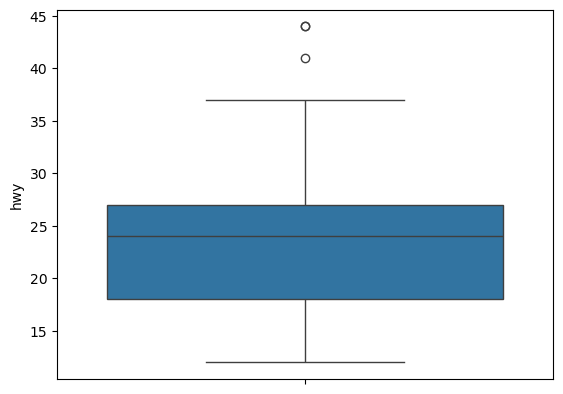

In [189]:
mpg = pd.read_csv('./data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [190]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [191]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [192]:
iqr = pct75 - pct25
iqr

9.0

In [198]:
hwy_min = pct25 - 1.5 * iqr  # 하한
hwy_min

4.5

In [197]:
hwy_max = pct75 + 1.5 * iqr  # 상한
hwy_max

40.5

In [199]:
mpg.loc[mpg['hwy'] < 4.5 ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [200]:
mpg.loc[mpg['hwy'] > 40.5 ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [201]:
import pandas as pd
mpg = pd.read_csv('./data/mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

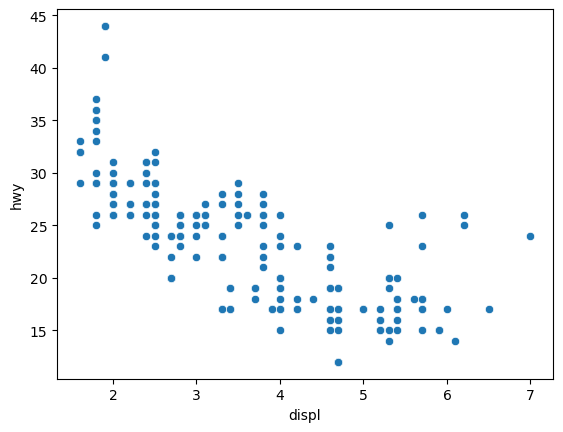

In [202]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

In [240]:
df_suv = mpg[mpg['category'] == 'suv']

In [259]:
cty = (
    mpg.query("category == 'suv'")
    .groupby('manufacturer')
    .agg(mean_cty=('cty','mean'))
    .sort_values('mean_cty',ascending=False)
    .head(5)
)
cty

,mean_cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

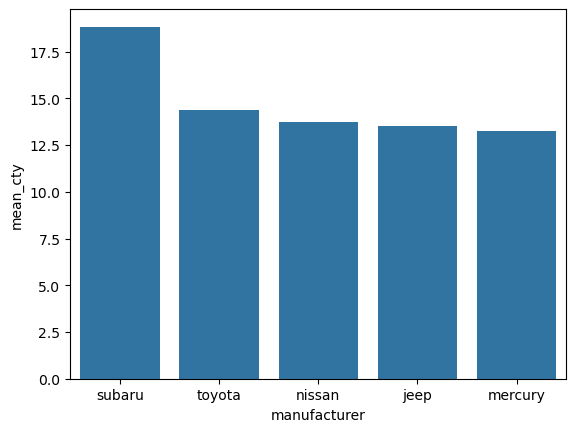

In [264]:
sns.barplot(data = cty, x = 'manufacturer', y = 'mean_cty')

In [266]:
cat = mpg.groupby('category').agg(count_cat=('category','count')).sort_values('count_cal',ascending=False)
cat

KeyError: 'count_cal'